In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# --- Load data from your JSONL file ---
input_file = '../data/processed/code_search_20250424_000000/results/aws_provider_repos.jsonl'
data = []
with open(input_file, 'r') as f:
    for line in f:
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
# Convert to DataFrame
df = pd.DataFrame(data)

print("Data loaded successfully!")
df.head()

Data loaded successfully!


,repository,serverless_config,github_metadata,is_fork,last_commit_date,stars_count,watchers_count,open_issues_count,repo_created_at,repo_updated_at,license_name
0,0xEduardo/nodeless,"{'plugins': [], 'runtimes': ['nodejs12.x'], 'e...","{'size_kb': 138, 'forks': 0, 'stars': 0, 'topi...",False,2023-07-13T00:46:38Z,0,0,2,2022-06-05T12:51:22Z,2022-06-06T14:56:49Z,MIT License
1,0xayot/waas,"{'plugins': ['serverless-bundle', 'serverless-...","{'size_kb': 450, 'forks': 0, 'stars': 0, 'topi...",False,2024-09-06T07:03:02Z,0,0,0,2022-12-20T08:44:49Z,2024-09-06T07:03:09Z,MIT License
2,20minutes/serverless-github-check,"{'plugins': ['serverless-webpack', 'serverless...","{'size_kb': 6741, 'forks': 0, 'stars': 14, 'to...",False,2025-05-06T01:06:25Z,14,14,0,2018-11-12T14:12:40Z,2025-05-06T01:06:28Z,MIT License
3,20minutes/serverless-provisioned-memory-report,"{'plugins': ['serverless-webpack', 'serverless...","{'size_kb': 5600, 'forks': 0, 'stars': 1, 'top...",False,2025-05-06T01:03:27Z,1,1,0,2022-08-31T14:48:32Z,2025-05-06T01:03:30Z,MIT License
4,2amigos/laravel-mail-api,"{'plugins': ['./vendor/bref/bref', 'serverless...","{'size_kb': 1069, 'forks': 1, 'stars': 4, 'top...",False,2023-12-20T02:46:21Z,4,4,0,2023-07-28T14:16:41Z,2025-04-10T21:03:09Z,Other


In [2]:
# Convert the 'repo_created_at' column to datetime objects
df['repo_created_at'] = pd.to_datetime(df['repo_created_at'])

# Set the creation date as the DataFrame index
df = df.set_index('repo_created_at')

print("Converted 'repo_created_at' to datetime and set as index.")
df.info()

Converted 'repo_created_at' to datetime and set as index.
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 668 entries, 2022-06-05 12:51:22+00:00 to 2017-11-27 08:17:44+00:00
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   repository         668 non-null    object
 1   serverless_config  668 non-null    object
 2   github_metadata    668 non-null    object
 3   is_fork            668 non-null    bool  
 4   last_commit_date   668 non-null    object
 5   stars_count        668 non-null    int64 
 6   watchers_count     668 non-null    int64 
 7   open_issues_count  668 non-null    int64 
 8   repo_updated_at    668 non-null    object
 9   license_name       668 non-null    object
dtypes: bool(1), int64(3), object(6)
memory usage: 52.8+ KB


In [3]:
# Group by year and count the number of repositories.
# The 'Y' stands for Year-end frequency.
yearly_counts = df.resample('Y').size()

# For cleaner labels, we can change the index from a timestamp to just the year
yearly_counts.index = yearly_counts.index.year
yearly_counts.index.name = 'Year'

print("Repository Counts per Year:")
print(yearly_counts)

Repository Counts per Year:
Year
2011      1
2012      0
2013      0
2014      0
2015      2
2016     12
2017     30
2018     48
2019     85
2020     77
2021     61
2022     76
2023    143
2024    103
2025     30
dtype: int64


/var/folders/dv/k_517rt53cd11vn4d1p1r1vh0000gn/T/ipykernel_2289/3598636440.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_counts = df.resample('Y').size()


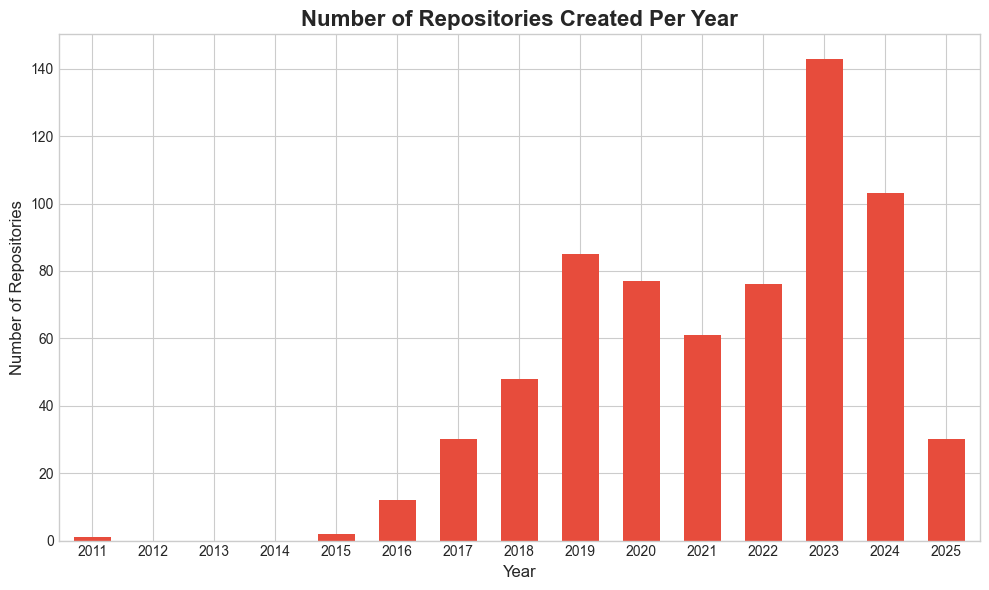

Histogram has been exported as 'yearly_histogram.pdf'


In [4]:
# Set plot style and size
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

# Create the bar plot for the yearly data
yearly_counts.plot(kind='bar', color='#e74c3c', width=0.6)

# Add titles and labels for clarity
plt.title('Number of Repositories Created Per Year', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Repositories', fontsize=12)

# Set x-axis labels to be horizontal
plt.xticks(rotation=0)

# Ensure everything fits nicely
plt.tight_layout()

# --- Save the figure as a PDF before showing it ---
# The bbox_inches='tight' argument crops the saved figure to a tight bounding box.
plt.savefig('../paper/figs/yearly_histogram.pdf', bbox_inches='tight')

# Display the plot
plt.show()

print("Histogram has been exported as 'yearly_histogram.pdf'")